In [1]:
from sklearn.linear_model    import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble        import RandomForestRegressor, GradientBoostingRegressor
from xgboost                 import XGBRegressor

from sklearn.metrics         import mean_absolute_error , mean_squared_error 

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as ms
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
bike_df = pd.read_csv('./data/kaggle/kaggle_bike_train.csv')

In [4]:
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
bike_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
bike_df.dtypes.value_counts()

int64      8
float64    3
object     1
dtype: int64

<AxesSubplot:xlabel='count', ylabel='Density'>

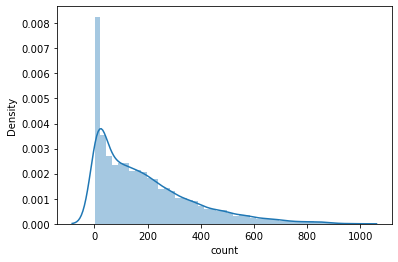

In [7]:
sns.distplot(bike_df['count'])

In [9]:
# datetime 타입변경
# 년, 월, 일, 시간 나누어 보자
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [10]:
bike_df['year']  = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day']   = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour']  = bike_df.datetime.apply(lambda x : x.hour)
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [11]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [12]:
bike_df.drop(['datetime'] , axis=1 , inplace=True)
# sns.pairplot(bike_df[['season' , 'registered' , 'casual' , 'count' ]])

In [13]:
#bike_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


In [14]:
def evaluation_rmsle(y, pred) :
    log_y    = np.log1p(y)
    log_pred = np.log1p(pred)
    error = (log_y - log_pred) ** 2
    return np.sqrt( np.mean(error) )

def evaluation(y , pred) :
    mae   = mean_absolute_error(y , pred)
    mse   = mean_squared_error(y , pred)
    rmse  = np.sqrt(mean_squared_error(y , pred))
    rmsle = evaluation_rmsle(y, pred)
    print('MAE : {} , MSE : {} , RMSE : {} , RMSLE : {} '.format(mae, mse, rmse, rmsle)) 

In [15]:
y_target   = bike_df['count']
X_features = bike_df.drop(['count'] , axis=1 , inplace=False)  

In [16]:
X_train , X_test , y_train, y_test = train_test_split(X_features, y_target , test_size=0.2 , random_state=100)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((8708, 14), (2178, 14), (8708,), (2178,))

In [17]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

evaluation(y_test , linear_pred)

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

evaluation(y_test , ridge_pred)

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

evaluation(y_test , lasso_pred)


MAE : 2.5302655593646484e-13 , MSE : 1.043229438913613e-25 , RMSE : 3.2299062508277433e-13 , RMSLE : 3.133092306792712e-14 
MAE : 2.1378817175891097e-06 , MSE : 1.0165014142206464e-11 , RMSE : 3.188261931241921e-06 , RMSLE : 1.9120387346761847e-07 
MAE : 0.013685009711106132 , MSE : 0.00041966226446925076 , RMSE : 0.020485659971532545 , RMSLE : 0.0009930903881668579 


In [18]:
def error_data(y_test , pred) :
    error_data_df = pd.DataFrame(y_test.values , columns=['target'])
    error_data_df['prediction'] = np.round(pred)
    error_data_df['differ']     = np.abs( error_data_df['target'] - error_data_df['prediction'] )
    display( error_data_df.sort_values('differ' , ascending=False) ) 


In [19]:
error_data(y_test , ridge_pred)

,target,prediction,differ
0,513,513.0,0.0
1454,118,118.0,0.0
1448,120,120.0,0.0
1449,220,220.0,0.0
1450,37,37.0,0.0
...,...,...,...
720,184,184.0,0.0
719,446,446.0,0.0
718,392,392.0,0.0
717,221,221.0,0.0


In [20]:
# 타켓에 대한 로그변환 , 피처는 X
# 시각화 살펴볼  것
# 학습 예측 평가

log_target = np.log1p(y_target)
# sns.distplot(log_target)

X_train , X_test , y_train, y_test = train_test_split(X_features, log_target , test_size=0.2 , random_state=100)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

# 지수 np -> exp() , exp2() , expm1() = exp() - 1
# y_test_exp = np.expm1(y_test)

evaluation( np.expm1(y_test) , np.expm1(linear_pred) )

MAE : 107.68976207017818 , MSE : 155870.60215060294 , RMSE : 394.8045113098417 , RMSLE : 0.7088625245726066 


<AxesSubplot:>

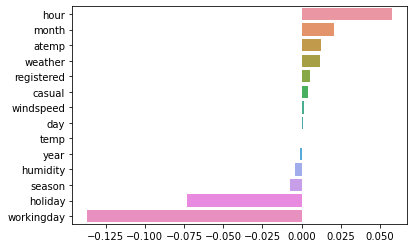

In [21]:
coef_series =  pd.Series( linear_model.coef_  , index=X_features.columns)
sns.barplot(x =  coef_series.sort_values(ascending=False).values , y = coef_series.sort_values(ascending=False).index)

In [62]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  year        10886 non-null  int64  
 12  month       10886 non-null  int64  
 13  day         10886 non-null  int64  
 14  hour        10886 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 1.2 MB


In [22]:
# bike_df.drop(['casual' , 'registered'] , axis=1 , inplace=True)
# bike_df
y_target   = bike_df['count']
X_features = bike_df.drop(['count'] , axis=1 , inplace=False)  


In [23]:
ohe_features = pd.get_dummies(X_features , columns=['season','holiday','workingday','weather','year','month','day','hour'])
ohe_features

,temp,atemp,humidity,windspeed,casual,registered,season_1,season_2,season_3,season_4,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,9.84,14.395,81,0.0000,3,13,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.02,13.635,80,0.0000,8,32,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.02,13.635,80,0.0000,5,27,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.84,14.395,75,0.0000,3,10,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.84,14.395,75,0.0000,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,7,329,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
10882,14.76,17.425,57,15.0013,10,231,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
10883,13.94,15.910,61,15.0013,4,164,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
10884,13.94,17.425,61,6.0032,12,117,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [24]:
X_train , X_test , y_train, y_test = train_test_split(ohe_features, log_target , test_size=0.2 , random_state=100)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

# 지수 np -> exp() , exp2() , expm1() = exp() - 1
# y_test_exp = np.expm1(y_test)

evaluation( np.expm1(y_test) , np.expm1(linear_pred) )

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

evaluation(np.expm1(y_test) , np.expm1(ridge_pred) )

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

evaluation(np.expm1(y_test) , np.expm1(lasso_pred) )



MAE : 47.36049721862805 , MSE : 16427.26245300162 , RMSE : 128.16888254565387 , RMSLE : 0.47999778352692996 
MAE : 47.501718259309726 , MSE : 16694.832380365584 , RMSE : 129.20848416557476 , RMSLE : 0.4799170551386148 
MAE : 137.38449736467925 , MSE : 267468.2114854979 , RMSE : 517.1732896094866 , RMSLE : 0.8227487927803011 


In [80]:
forest_model = RandomForestRegressor(n_estimators = 500)
boost_model  = GradientBoostingRegressor(n_estimators = 500)
xgb_model    = XGBRegressor(n_estimators = 500)



In [96]:
X_train , X_test , y_train, y_test = train_test_split(ohe_features, log_target , test_size=0.3 , random_state=100)

# forest_model.fit(X_train, y_train)
# forest_pred = forest_model.predict(X_test)
# evaluation(np.expm1(y_test) , np.expm1(forest_pred) )

# boost_model.fit(X_train, y_train)
# boost_pred = boost_model.predict(X_test)
# evaluation(np.expm1(y_test) , np.expm1(boost_pred) )

# xgb_model.fit(X_train, y_train)
# xgb_pred = xgb_model.predict(X_test)
# evaluation(np.expm1(y_test) , np.expm1(xgb_pred) )


MAE : 30.1772736693853 , MSE : 2374.357132592075 , RMSE : 48.727375597215115 , RMSLE : 0.3580952728897497 
MAE : 33.24378051200599 , MSE : 2811.2240503869943 , RMSE : 53.02097745597486 , RMSLE : 0.34511690010733476 
MAE : 30.699317381406445 , MSE : 2641.928673834552 , RMSE : 51.39969526986081 , RMSLE : 0.35181524505781064 


In [97]:
def model_pred(model , X_train, X_test, y_train, y_test) :
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    y_test = np.expm1(y_test) 
    pred   = np.expm1(pred)
    evaluation(y_test , pred)
    

In [98]:
model_pred(forest_model , X_train, X_test, y_train, y_test)
model_pred(boost_model  , X_train, X_test, y_train, y_test)
model_pred(xgb_model    , X_train, X_test, y_train, y_test)

MAE : 30.3669243532348 , MSE : 2421.696257318648 , RMSE : 49.21073315160675 , RMSLE : 0.3588638675184259 
MAE : 33.22485019685067 , MSE : 2809.855539217247 , RMSE : 53.00807051022747 , RMSLE : 0.3450062876237024 
MAE : 30.699317381406445 , MSE : 2641.928673834552 , RMSE : 51.39969526986081 , RMSLE : 0.35181524505781064 


In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [26]:
X_features

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,2012,12,19,22


In [28]:
scaler = MinMaxScaler(feature_range=(0,1))
scaling_X_features = scaler.fit_transform(X_features)
print(scaling_X_features)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.04347826]
 [0.         0.         0.         ... 0.         0.         0.08695652]
 ...
 [1.         0.         1.         ... 1.         1.         0.91304348]
 [1.         0.         1.         ... 1.         1.         0.95652174]
 [1.         0.         1.         ... 1.         1.         1.        ]]


In [29]:
X_train , X_test , y_train, y_test = train_test_split(scaling_X_features, log_target , test_size=0.3 , random_state=100)

In [30]:
def model_pred(model , X_train, X_test, y_train, y_test) :
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    y_test = np.expm1(y_test) 
    pred   = np.expm1(pred)
    evaluation(y_test , pred)

In [33]:
forest_model = RandomForestRegressor(n_estimators = 500)
boost_model  = GradientBoostingRegressor(n_estimators = 500)
xgb_model    = XGBRegressor(n_estimators = 500)


In [35]:
model_pred(forest_model , X_train, X_test, y_train, y_test)
model_pred(boost_model  , X_train, X_test, y_train, y_test)
model_pred(xgb_model    , X_train, X_test, y_train, y_test)

MAE : 1.2497492137592157 , MSE : 9.742411051011661 , RMSE : 3.1212835582515828 , RMSLE : 0.011537007453469332 
MAE : 1.9012793812309556 , MSE : 11.286423575875427 , RMSE : 3.359527284585649 , RMSLE : 0.013647819405212064 
MAE : 1.6224532649331636 , MSE : 11.898265422145041 , RMSE : 3.4493862384698297 , RMSLE : 0.011711644841881523 


In [37]:
scaler = StandardScaler()
scaling_X_features = scaler.fit_transform(X_features)
print(scaling_X_features)

[[-1.34986372 -0.17149048 -1.46067232 ... -1.60312148 -1.64206967
  -1.66894356]
 [-1.34986372 -0.17149048 -1.46067232 ... -1.60312148 -1.64206967
  -1.52434128]
 [-1.34986372 -0.17149048 -1.46067232 ... -1.60312148 -1.64206967
  -1.379739  ]
 ...
 [ 1.33801198 -0.17149048  0.68461625 ...  1.59063939  1.64478707
   1.36770431]
 [ 1.33801198 -0.17149048  0.68461625 ...  1.59063939  1.64478707
   1.51230659]
 [ 1.33801198 -0.17149048  0.68461625 ...  1.59063939  1.64478707
   1.65690887]]


In [39]:
X_train , X_test , y_train, y_test = train_test_split(scaling_X_features, log_target , test_size=0.3 , random_state=100)

In [40]:
model_pred(forest_model , X_train, X_test, y_train, y_test)
model_pred(boost_model  , X_train, X_test, y_train, y_test)
model_pred(xgb_model    , X_train, X_test, y_train, y_test)

MAE : 1.2437646700728355 , MSE : 9.668408825135064 , RMSE : 3.109406506897267 , RMSLE : 0.011387358089021322 
MAE : 1.8973332004194714 , MSE : 11.232430632757875 , RMSE : 3.3514818562477515 , RMSLE : 0.01363566152296935 
MAE : 1.6218476888962634 , MSE : 11.8981621874638 , RMSE : 3.4493712742272034 , RMSLE : 0.01160046436396834 
